# Section 4.1: Descriptive statistics on the bot-bot dataset

This is the first data analysis script used to produce findings in the paper, which you can run based entirely off the files in this GitHub repository. 

This entire notebook can be run from the beginning with Kernel -> Restart & Run All in the menu bar. It takes about 1 minute to run on a laptop running a Core i5-2540M processor.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
import datetime
%matplotlib inline

In [2]:
start = datetime.datetime.now()

## Data processing

In [3]:
!unxz -kf ../../datasets/parsed_dataframes/df_all_2016.pickle.xz

In [4]:
!ls ../../datasets/parsed_dataframes/*

../../datasets/parsed_dataframes/df_all_2016.pickle
../../datasets/parsed_dataframes/df_all_2016.pickle.xz


In [5]:
with open("../../datasets/parsed_dataframes/df_all_2016.pickle", "rb") as f:
    df_all = pickle.load(f)

In [6]:
len(df_all)

924945

### Final data format

In [7]:
df_all.sample(2).transpose()

,355979,304006
archived,False,False
language,en,en
page_namespace,14,4
rev_deleted,False,False
rev_id,246327189,156033990
rev_minor_edit,True,True
rev_page,5010220,11238105
rev_parent_id,2.16686e+08,1.56028e+08
rev_revert_offset,1,1
rev_sha1,jztsvvfhsdbebik9mqy6ibc4qd2169m,ruh5z4bonocvjw2nfnqq2ddq73hj1z0


## Descriptive statistics

### Number of bot-bot reverts per language over time, articles only

In [8]:
gb = df_all[df_all['page_namespace']==0].groupby(["language","reverting_year"])

In [9]:
sns.set(font_scale=1.5)
gb['rev_id'].count().unstack().transpose()

language,de,en,es,fr,ja,pt,zh
reverting_year,,,,,,,
2004,6.0,2.0,NaN,2.0,284.0,1.0,5.0
2005,376.0,108.0,492.0,227.0,29.0,205.0,20.0
2006,435.0,1112.0,796.0,738.0,117.0,722.0,187.0
2007,1379.0,5488.0,1689.0,2189.0,903.0,3179.0,634.0
2008,3230.0,13317.0,3112.0,3718.0,2189.0,2696.0,2097.0
2009,4710.0,16951.0,3415.0,4340.0,3198.0,5308.0,2755.0
2010,4967.0,13366.0,7109.0,5792.0,5277.0,4850.0,4452.0
2011,10386.0,30629.0,16895.0,14393.0,7642.0,15410.0,6318.0
2012,9554.0,26208.0,9131.0,9735.0,6888.0,7930.0,5742.0


#### Plot

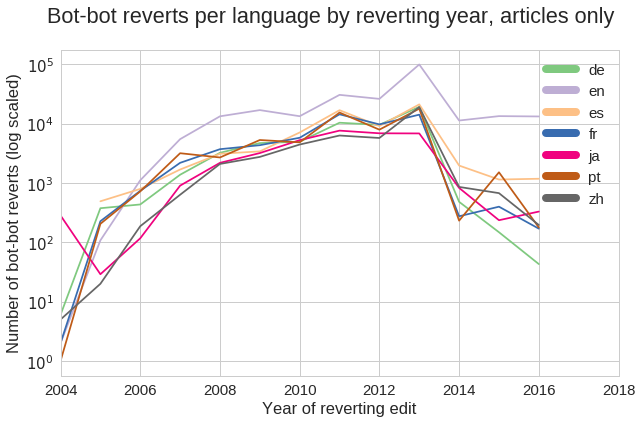

In [10]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

groupby_unstack = gb['revisions_reverted'].count().unstack().transpose()
ax = groupby_unstack.plot(kind='line', logy=True, figsize=[10,6], colormap="Accent")    

plt.xlim(2004,2018)

plt.ylabel("Number of bot-bot reverts (log scaled)")
plt.xlabel("Year of reverting edit")
plt.suptitle("Bot-bot reverts per language by reverting year, articles only")

leg = plt.legend()
for legobj in leg.legendHandles:
    legobj.set_linewidth(8.0)

#### Number of bot-bot reverts per language, all years, articles only

In [11]:
gb['rev_id'].count().unstack().transpose().sum()

language
de     54938.0
en    244793.0
es     68099.0
fr     56181.0
ja     34772.0
pt     60124.0
zh     43029.0
dtype: float64

#### Total number of bot-bot reverts, all 7 languages, all years, articles only

In [12]:
gb['rev_id'].count().unstack().transpose().sum().sum()

561936.0

### Number of bot-bot reverts per language over time, all namespaces

In [13]:
gb_lang_nstype = df_all.groupby(["language", "namespace_type"])

gb_lang_nstype['revisions_reverted'].count().unstack().transpose()

language,de,en,es,fr,ja,pt,zh
namespace_type,,,,,,,
article,54938,244793,68099,56181,34772,60124,43029
category,10590,106231,19079,21123,10075,9929,6725
other page,1051,108361,1556,614,277,536,1456
other talk,2689,43525,37,18528,23,362,242


#### Plot

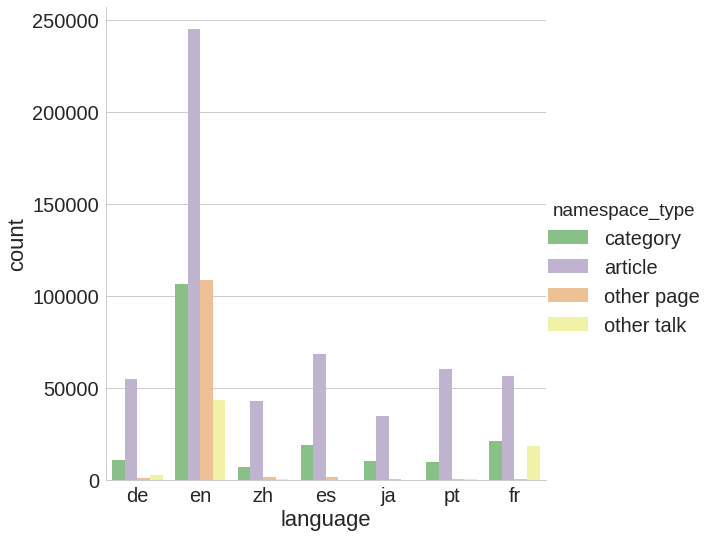

In [14]:
sns.set(font_scale=2)
sns.set_style("whitegrid")

g = sns.factorplot(data=df_all,
                   x='language',
                   y=None,
                   hue='namespace_type',
                   kind='count',
                   size=8,
                   palette="Accent",
                   aspect = 1)

#### Number of bot-bot reverts per language, all years, all namespaces

In [15]:
gb_lang_nstype['revisions_reverted'].count().unstack().transpose().sum()

language
de     69268
en    502910
es     88771
fr     96446
ja     45147
pt     70951
zh     51452
dtype: int64

#### Number of bot-bot reverts by namespace type, all 7 languages, all years, all namespaces

In [16]:
gb_lang_nstype['revisions_reverted'].count().unstack().sum()

namespace_type
article       561936
category      183752
other page    113851
other talk     65406
dtype: int64

#### Proportion of bot-bot reverts by namespace type, all 7 languages, all years, all namespaces

In [17]:
df_all['namespace_type'].value_counts(normalize=True)

article       0.607535
category      0.198663
other page    0.123089
other talk    0.070713
Name: namespace_type, dtype: float64

### Runtime

In [18]:
end = datetime.datetime.now()

time_to_run = end - start
minutes = int(time_to_run.seconds/60)
seconds = time_to_run.seconds % 60
print("Total runtime: ", minutes, "minutes, ", seconds, "seconds")

Total runtime:  0 minutes,  49 seconds
